In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [5]:
df = pd.read_csv("C:\\Users\\Chinmaya holla\\Desktop\\Airpollution\\Data\\Processed_data\\model_ready_data.csv")
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [6]:
train_data = df[df['Timestamp'].dt.year <= 2023]
test_data = df[df['Timestamp'].dt.year == 2024]


target = 'PM2_5'
cols_to_drop = ['Timestamp', 'PM2_5', 'PM2_5_AQI']
features = [c for c in df.columns if c not in cols_to_drop]

X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42, n_jobs=-1)
}

In [7]:
results = []

print(f"Starting comparison on {len(X_train)} training rows...")

for name, model in models.items():
    print(f"Training {name}...")
    
    
    model.fit(X_train, y_train)
    
    
    predictions = model.predict(X_test)
    
    
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    
    results.append({
        "Model": name,
        "MAE": mae,
        "RMSE": rmse,
        "R2 Score": r2
    })

Starting comparison on 9296 training rows...
Training Linear Regression...
Training Random Forest...
Training XGBoost...


In [8]:
leaderboard = pd.DataFrame(results).sort_values(by="MAE", ascending=True)
print("\n" + "="*40)
print("FINAL LEADERBOARD (Lower MAE is Better)")
print("="*40)
print(leaderboard)


FINAL LEADERBOARD (Lower MAE is Better)
               Model       MAE       RMSE  R2 Score
1      Random Forest  8.020537  23.999310  0.421610
0  Linear Regression  8.331572  24.382407  0.402997
2            XGBoost  8.944190  26.002992  0.321000


C:\Users\Chinmaya holla\AppData\Local\Temp\ipykernel_4520\2432796719.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=leaderboard, x="Model", y="MAE", palette="viridis")


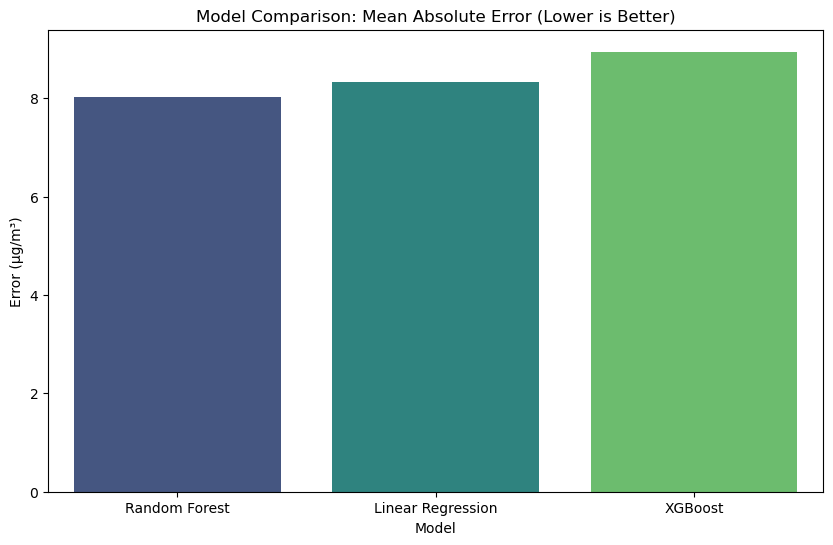

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(data=leaderboard, x="Model", y="MAE", palette="viridis")
plt.title("Model Comparison: Mean Absolute Error (Lower is Better)")
plt.ylabel("Error (µg/m³)")
plt.show()